In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import string
import re
from statistics import mean

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [2]:
train_df = pd.read_csv('data/train.csv', encoding = 'latin-1')
test_df = pd.read_csv('data/test.csv', encoding = 'latin-1')

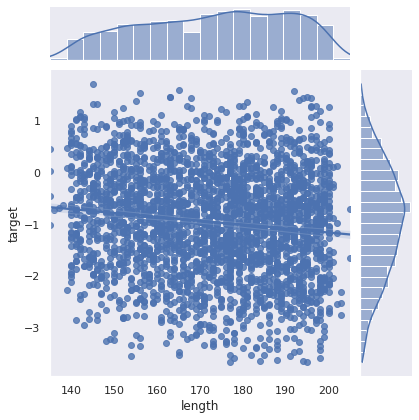

In [3]:
## EXPLORATORY ANALYSIS

# Let's see the distribution of the lengths of the texts, and see if they have any correlation with the target
train_df['length'] = train_df['excerpt'].str.lower().str.split().apply(len)

#sns.jointplot(x=train_df["length"], y=train_df["target"], kind='scatter', s=200, color='grey', edgecolor="skyblue", linewidth=2)
sns.set(style="dark", color_codes=True)
#sns.jointplot(x=train_df["length"], y=train_df["target"], kind='kde', color="skyblue")
sns.jointplot(x=train_df["length"], y=train_df["target"], kind='reg')


In [4]:
display(train_df.describe())
display("Target", train_df.sort_values(by='target', ascending=True)['target'])
display('Length', train_df.sort_values(by='length', ascending=False)['length'])
display('Standard Error', train_df.sort_values(by='standard_error', ascending=False)['standard_error'])

,target,standard_error,length
count,2834.000000,2834.000000,2834.000000
mean,-0.959319,0.491435,172.982357
std,1.033579,0.034818,16.974859
min,-3.676268,0.000000,135.000000
25%,-1.690320,0.468543,159.000000
50%,-0.912190,0.484721,175.000000
75%,-0.202540,0.506268,188.000000
max,1.711390,0.649671,205.000000


'Target'

1705   -3.676268
1128   -3.668360
1754   -3.642892
1752   -3.639936
1720   -3.636834
          ...   
1066    1.467665
1014    1.541672
808     1.583847
981     1.597870
2829    1.711390
Name: target, Length: 2834, dtype: float64

'Length'

2271    205
908     205
1771    203
1636    203
1561    203
       ... 
509     136
469     135
396     135
787     135
163     135
Name: length, Length: 2834, dtype: int64

'Standard Error'

2235    0.649671
375     0.648733
2168    0.648481
661     0.648474
486     0.648174
          ...   
1576    0.434138
2759    0.433708
196     0.433000
2483    0.428233
106     0.000000
Name: standard_error, Length: 2834, dtype: float64

In [5]:
def clean_text (df : pd.DataFrame) -> None:
    '''Tokenize; remove stop words and puntuation; make lower case'''

    regex = re.compile('[%s]' % re.escape(string.punctuation)) 
    stop_words = stopwords.words('english')
    stop_words.append('the')

    df['cleaned_text'] = df['excerpt'].apply(lambda x: ''.join([str.lower(y) for y in x])) #Make lower case
    df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if not w in stop_words])) #Remove stop words

    #df['cleaned_text'] = df['cleaned_text'].apply(lambda X : ''.join(list(filter(lambda x : not x in stop_words, X)))) #Remove stop words
    df['cleaned_text'] = df['cleaned_text'].apply(word_tokenize) #Tokenize words
    df['cleaned_text'] =\
        df['cleaned_text'].apply(lambda x : ' '.join([y.translate(str.maketrans('','',string.punctuation + ' ')) for y in x])) #Remove punctuation
    return

clean_text(train_df)
train_df['cleaned_text']
#stop_words = stopwords.words('english')
#list(filter(lambda x: not x in stop_words, "hellow, how is that as I think"))

0       young people returned ballroom  presented deci...
1       dinner time  mrs fayre somewhat silent  eyes r...
2       roger predicted  snow departed quickly came  t...
3       outside palace great garden walled round  fill...
4       upon time three bears lived together house woo...
                              ...                        
2829    think dinosaurs lived  picture  see hot  steam...
2830    solid  solids usually hard molecules packed to...
2831    second state matter discuss liquid  solids har...
2832    solids shapes actually touch  three dimensions...
2833    animals made many cells  eat things digest ins...
Name: cleaned_text, Length: 2834, dtype: object

0


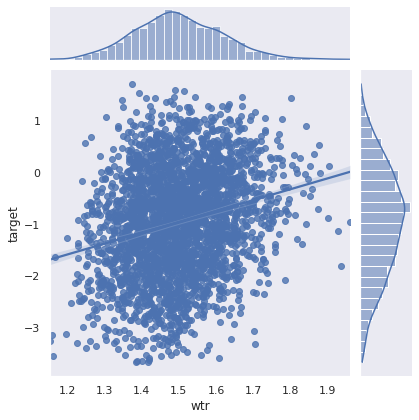

In [6]:
def occurrences_of (s:str, df:pd.DataFrame) -> int:
    return sum(df.apply(lambda x: sum([y == s for y in x])))

print(occurrences_of('the', train_df['cleaned_text']))    

def mean_word_length (df:pd.DataFrame, col='cleaned_text') -> None:
    '''Creates a column 'mwl' in df for the mean of the word length in col'''

    df['mwl'] = df[col].apply(lambda x: list(map(len,x.split()))) #Length of each word
    df['mwl'] = df['mwl'].apply(lambda x: list(map(float,x))) #Convert the lengths to floats
    df['mwl'] = df['mwl'].apply(lambda x: mean(x)) #Calculate the mean
    return

mean_word_length(train_df)

# A simmilar measure could be the ratio Nº of words/text length

def words_textlength_ratio (df:pd.DataFrame, col='cleaned_text') -> None:
    '''Creates a column 'wtr' in df for the ratio number of words / text length'''

    df['wtr'] = df['excerpt'].apply(len)/df[col].apply(len) #Number of words of each text
    #df['wtr'] = df['wtr'].apply(float)
    return

words_textlength_ratio(train_df)
train_df
#sns.jointplot(x=train_df["mwl"], y=train_df["target"], kind='reg')
sns.jointplot(x=train_df["wtr"], y=train_df["target"], kind='reg')
#sns.lmplot("wtr", "target", train_df, aspect=2)


In [7]:
snowball = SnowballStemmer('english')
#porter = PorterStemmer()

def stemmatize_text(df:pd.DataFrame, col='cleaned_text') -> None:
    df[col] = df[col].apply(lambda x: ' '.join([snowball.stem(w) for w in x.split()]))
    return

stemmatize_text(train_df)
#train_df

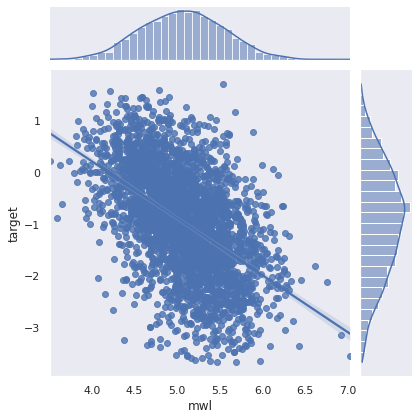

In [8]:
mean_word_length(train_df)

words_textlength_ratio(train_df)
train_df
sns.jointplot(x=train_df["mwl"], y=train_df["target"], kind='reg')
#sns.jointplot(x=train_df["wtr"], y=train_df["target"], kind='reg')
#sns.lmplot("wtr", "target", train_df, aspect=2)


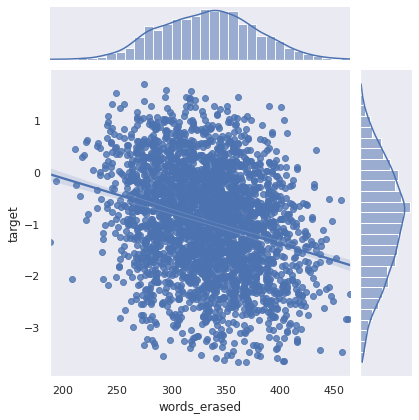

In [9]:
train_df['words_erased'] = train_df['excerpt'].apply(lambda x: list(map(len,x.split()))).apply(lambda x: list(map(float,x))).apply(lambda x: sum(x))- \
    train_df['cleaned_text'].apply(lambda x: list(map(len,x.split()))).apply(lambda x: list(map(float,x))).apply(lambda x: sum(x))

sns.jointplot(x=train_df["words_erased"], y=train_df["target"], kind='reg')

In [10]:
keep_columns_train = ['id', 'target', 'standard_error', 'excerpt', 'cleaned_text']
train_df = train_df[keep_columns_train]

In [11]:
clean_text(test_df)
stemmatize_text(test_df)
keep_columns_test = ['id', 'excerpt', 'cleaned_text']

test_df = test_df[keep_columns_test]

train_df.to_csv('train_df.csv',index=False)
test_df.to_csv('test_df.csv',index=False)